In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import ast
from collections import Counter
import re
import mysql.connector

In [1]:
# AWS path and pw

In [5]:
cur.execute("SELECT * FROM movie")
result = cur.fetchall()
raw_data = pd.DataFrame(result)
raw_data.head()

,0,1,2,3,4,5,6,7,8
0,0,1,명량,2014,135748398910,17613682,1587,188611,"['사극', '액션']"
1,1,2,겨울왕국,2014,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']"
2,2,3,인터스텔라,2014,80671424300,10105247,1410,166218,['SF']
3,3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350,['어드벤처']
4,4,5,수상한 그녀,2014,62705348249,8657982,1027,136975,['드라마']


In [6]:
raw_data.rename(columns={0:"ID", 1:"Rank", 2:"Name", 3:"Year", 4:"Sale", 5:"Audience", 6:"Screen", 7:"ScreenNum", 8:"Genre"}, inplace=True)
raw_data.head()

,ID,Rank,Name,Year,Sale,Audience,Screen,ScreenNum,Genre
0,0,1,명량,2014,135748398910,17613682,1587,188611,"['사극', '액션']"
1,1,2,겨울왕국,2014,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']"
2,2,3,인터스텔라,2014,80671424300,10105247,1410,166218,['SF']
3,3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350,['어드벤처']
4,4,5,수상한 그녀,2014,62705348249,8657982,1027,136975,['드라마']


In [7]:
genres = ['미스터리', '공포(호러)', '액션', '범죄', '판타지', '드라마', 'SF', '다큐멘터리', '전쟁','코미디', '뮤지컬', '애니메이션', '스릴러', '어드벤처', '사극', '멜로/로맨스', '기타']

In [8]:
len(genres)

17

In [9]:
raw_data = raw_data[(raw_data["Year"] >= 2014) & (raw_data["Year"] <= 2023)]
raw_data.reset_index(drop=True, inplace=True)
raw_data.head()

,ID,Rank,Name,Year,Sale,Audience,Screen,ScreenNum,Genre
0,0,1,명량,2014,135748398910,17613682,1587,188611,"['사극', '액션']"
1,1,2,겨울왕국,2014,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']"
2,2,3,인터스텔라,2014,80671424300,10105247,1410,166218,['SF']
3,3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350,['어드벤처']
4,4,5,수상한 그녀,2014,62705348249,8657982,1027,136975,['드라마']


In [10]:
data_2014 = raw_data[raw_data["Year"]==2014]
data_2015 = raw_data[raw_data["Year"]==2015]
data_2016 = raw_data[raw_data["Year"]==2016]
data_2017 = raw_data[raw_data["Year"]==2017]
data_2018 = raw_data[raw_data["Year"]==2018]
data_2019 = raw_data[raw_data["Year"]==2019]
data_2020 = raw_data[raw_data["Year"]==2020]
data_2021 = raw_data[raw_data["Year"]==2021]
data_2022 = raw_data[raw_data["Year"]==2022]
data_2023 = raw_data[raw_data["Year"]==2023]

In [11]:
comedy_movie = []
musical_movie = []
animation_movie = []
thriller_movie = []
adventure_movie = []
history_movie = []
melo_movie = []
others_movie = []

com_year = []
mus_year = []
ani_year = []
thr_year = []
adv_year = []
his_year = []
mel_year = []
oth_year = []

for idx, data in data_2014.iterrows():
    genres = data["Genre"]
    if '코미디' in genres:
        comedy_movie.append(data["Name"])
        com_year.append(data["Year"])
    if '뮤지컬' in genres:
        musical_movie.append(data["Name"])
        mus_year.append(data["Year"])
    if '애니메이션' in genres:
        animation_movie.append(data["Name"])
        ani_year.append(data["Year"])
    if '스릴러' in genres:
        thriller_movie.append(data["Name"])
        thr_year.append(data["Year"])
    if '어드벤처' in genres:
        adventure_movie.append(data["Name"])
        adv_year.append(data["Year"])
    if '사극' in genres:
        history_movie.append(data["Name"])
        his_year.append(data["Year"])
    if '멜로/로맨스' in genres:
        melo_movie.append(data["Name"])
        mel_year.append(data["Year"])
    if '기타' in genres:
        others_movie.append(data["Name"])
        oth_year.append(data["Year"])
    
len(comedy_movie), len(musical_movie), len(animation_movie), len(thriller_movie), len(adventure_movie), len(history_movie), len(melo_movie), len(others_movie)

(5, 1, 3, 6, 12, 3, 5, 0)

In [12]:
len(com_year), len(mus_year), len(ani_year), len(thr_year), len(adv_year), len(his_year), len(mel_year), len(oth_year)

(5, 1, 3, 6, 12, 3, 5, 0)

In [13]:
data_2014[data_2014["Name"]==comedy_movie[0]]

,ID,Rank,Name,Year,Sale,Audience,Screen,ScreenNum,Genre
1,1,2,겨울왕국,2014,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']"


In [14]:
data_2014[data_2014["Name"]==comedy_movie[0]]["Audience"]

1    10296101
Name: Audience, dtype: int64

In [15]:
com_sum = []
com_sum_cur = 0
for idx in range(len(comedy_movie)):
    print(idx)
    print(comedy_movie[idx])
    data = data_2014[data_2014["Name"]==comedy_movie[idx]]
    print(data["Audience"])
    com_sum_cur += data["Audience"].sum()
    print(com_sum_cur)
com_sum.append(com_sum_cur)
print(com_sum)

0
겨울왕국
1    10296101
Name: Audience, dtype: int64
10296101
1
나의 사랑 나의 신부
23    2141155
Name: Audience, dtype: int64
12437256
2
피끓는 청춘
32    1676040
Name: Audience, dtype: int64
14113296
3
슬로우 비디오
46    1169562
Name: Audience, dtype: int64
15282858
4
마다가스카의 펭귄
88    1512340
Name: Audience, dtype: int64
16795198
[16795198]


In [16]:
years = []
genresD = []
genre_sums = []

mys_sum_cur = 0
hor_sum_cur = 0
act_sum_cur = 0
cri_sum_cur = 0
fan_sum_cur = 0
dra_sum_cur = 0
sci_sum_cur = 0
doc_sum_cur = 0
war_sum_cur = 0
com_sum_cur = 0
mus_sum_cur = 0
ani_sum_cur = 0
thr_sum_cur = 0
adv_sum_cur = 0
his_sum_cur = 0
mel_sum_cur = 0
oth_sum_cur = 0

In [17]:
genres = ['미스터리', '공포(호러)', '액션', '범죄', '판타지', '드라마', 'SF', '다큐멘터리', '전쟁','코미디', '뮤지컬', '애니메이션', '스릴러', '어드벤처', '사극', '멜로/로맨스', '기타']

In [18]:
def sum_aud_genre(genre, genre_movie, yearsData):
    genresD.append(genre)
    global mys_sum_cur, hor_sum_cur, act_sum_cur, cri_sum_cur, fan_sum_cur, dra_sum_cur, sci_sum_cur, doc_sum_cur, war_sum_cur
    global com_sum_cur, mus_sum_cur, ani_sum_cur, thr_sum_cur, adv_sum_cur, his_sum_cur, mel_sum_cur, oth_sum_cur
    
    for idx in range(len(genre_movie)):
        movieD = yearsData[yearsData["Name"]==genre_movie[idx]]
        if genre == "미스터리":
            mys_sum_cur += movieD["Audience"].sum()
        elif genre == "공포(호러)":
            hor_sum_cur += movieD["Audience"].sum()
        elif genre == "액션":
            act_sum_cur += movieD["Audience"].sum()
        elif genre == "범죄":
            cri_sum_cur += movieD["Audience"].sum()
        elif genre == "판타지":
            fan_sum_cur += movieD["Audience"].sum()
        elif genre == "드라마":
            dra_sum_cur += movieD["Audience"].sum()
        elif genre == "SF":
            sci_sum_cur += movieD["Audience"].sum()
        elif genre == "다큐멘터리":
            doc_sum_cur += movieD["Audience"].sum()
        elif genre == "전쟁":
            war_sum_cur += movieD["Audience"].sum()
        elif genre == "코미디":
            com_sum_cur += movieD["Audience"].sum()
        elif genre == "뮤지컬":
            mus_sum_cur += movieD["Audience"].sum()
        elif genre == "애니메이션":
            ani_sum_cur += movieD["Audience"].sum()
        elif genre == "스릴러":
            thr_sum_cur += movieD["Audience"].sum()
        elif genre == "어드벤처":
            adv_sum_cur += movieD["Audience"].sum()
        elif genre == "사극":
            his_sum_cur += movieD["Audience"].sum()
        elif genre == "멜로/로맨스":
            mel_sum_cur += movieD["Audience"].sum()
        elif genre == "기타":
            oth_sum_cur += movieD["Audience"].sum()

In [19]:
def extract_genre_audience(year):
    mystery_movie = []
    horror_movie = []
    action_movie = []
    crime_movie = []
    fantasy_movie = []
    drama_movie = []
    scifi_movie = []
    documentery_movie = []
    war_movie = []
    comedy_movie = []
    musical_movie = []
    animation_movie = []
    thriller_movie = []
    adventure_movie = []
    history_movie = []
    melo_movie = []
    others_movie = []

    genres = ['미스터리', '공포(호러)', '액션', '범죄', '판타지', '드라마', 'SF', '다큐멘터리', '전쟁','코미디', '뮤지컬', '애니메이션', '스릴러', '어드벤처', '사극', '멜로/로맨스', '기타']

    yearsD = raw_data[raw_data["Year"]==year]
    for idx, data in yearsD.iterrows():
        genresD = data["Genre"]
        if '미스터리' in genresD:
            mystery_movie.append(data["Name"])
        if '공포(호러)' in genresD:
            horror_movie.append(data["Name"])
        if '액션' in genresD:
            action_movie.append(data["Name"])
        if '범죄' in genresD:
            crime_movie.append(data["Name"])
        if '판타지' in genresD:
            fantasy_movie.append(data["Name"])
        if '드라마' in genresD:
            drama_movie.append(data["Name"])
        if 'SF' in genresD:
            scifi_movie.append(data["Name"])
        if '다큐멘터리' in genresD:
            documentery_movie.append(data["Name"])
        if '전쟁' in genresD:
            war_movie.append(data["Name"])
        if '코미디' in genresD:
            comedy_movie.append(data["Name"])
        if '뮤지컬' in genresD:
            musical_movie.append(data["Name"])
        if '애니메이션' in genresD:
            animation_movie.append(data["Name"])
        if '스릴러' in genresD:
            thriller_movie.append(data["Name"])
        if '어드벤처' in genresD:
            adventure_movie.append(data["Name"])
        if '사극' in genresD:
            history_movie.append(data["Name"])
        if '멜로/로맨스' in genresD:
            melo_movie.append(data["Name"])
        if '기타' in genresD:
            others_movie.append(data["Name"])

    sum_aud_genre(genres[0], mystery_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[1], horror_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[2], action_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[3], crime_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[4], fantasy_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[5], drama_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[6], scifi_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[7], documentery_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[8], war_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[9], comedy_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[10], musical_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[11], animation_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[12], thriller_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[13], adventure_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[14], history_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[15], melo_movie, yearsD)
    years.append(year)
    sum_aud_genre(genres[16], others_movie, yearsD)
    years.append(year)
    


    genre_sums.append(mys_sum_cur)
    genre_sums.append(hor_sum_cur)
    genre_sums.append(act_sum_cur)
    genre_sums.append(cri_sum_cur)
    genre_sums.append(fan_sum_cur)
    genre_sums.append(dra_sum_cur)
    genre_sums.append(sci_sum_cur)
    genre_sums.append(doc_sum_cur)
    genre_sums.append(war_sum_cur)
    genre_sums.append(com_sum_cur)
    genre_sums.append(mus_sum_cur)
    genre_sums.append(ani_sum_cur)
    genre_sums.append(thr_sum_cur)
    genre_sums.append(adv_sum_cur)
    genre_sums.append(his_sum_cur)
    genre_sums.append(mel_sum_cur)
    genre_sums.append(oth_sum_cur)

In [20]:
extract_genre_audience(2014)
extract_genre_audience(2015)
extract_genre_audience(2016)
extract_genre_audience(2017)
extract_genre_audience(2018)
extract_genre_audience(2019)
extract_genre_audience(2020)
extract_genre_audience(2021)
extract_genre_audience(2022)
extract_genre_audience(2023)

In [21]:
len(genresD), len(years), len(genre_sums)

(170, 170, 170)

In [22]:
data = {"Genre":genresD,"Years":years, "Genre Sum":genre_sums}
df = pd.DataFrame(data)
df.head()

,Genre,Years,Genre Sum
0,미스터리,2014,2812427
1,공포(호러),2014,0
2,액션,2014,81956423
3,범죄,2014,11006573
4,판타지,2014,24636557


In [27]:
genreVi = df.pivot_table(index="Genre", columns="Years", values="Genre Sum", aggfunc="sum")
genreVi.head()

Years,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Genre,,,,,,,,,,
SF,36503689,66252358,83843607,110785819,151901028,184020507,186970918,209320981,233249966,234457336
공포(호러),0,0,3039889,8494983,11170558,16060920,16635963,18493071,18909040,19621281
기타,0,0,0,0,0,0,0,0,0,4434744
다큐멘터리,3846378,3846378,3846378,5701527,5701527,5701527,5701527,5701527,5701527,5701527
드라마,71268101,151829554,211404631,305090561,365029792,447940247,470202788,483182039,511980946,539929441


<Axes: xlabel='Years'>

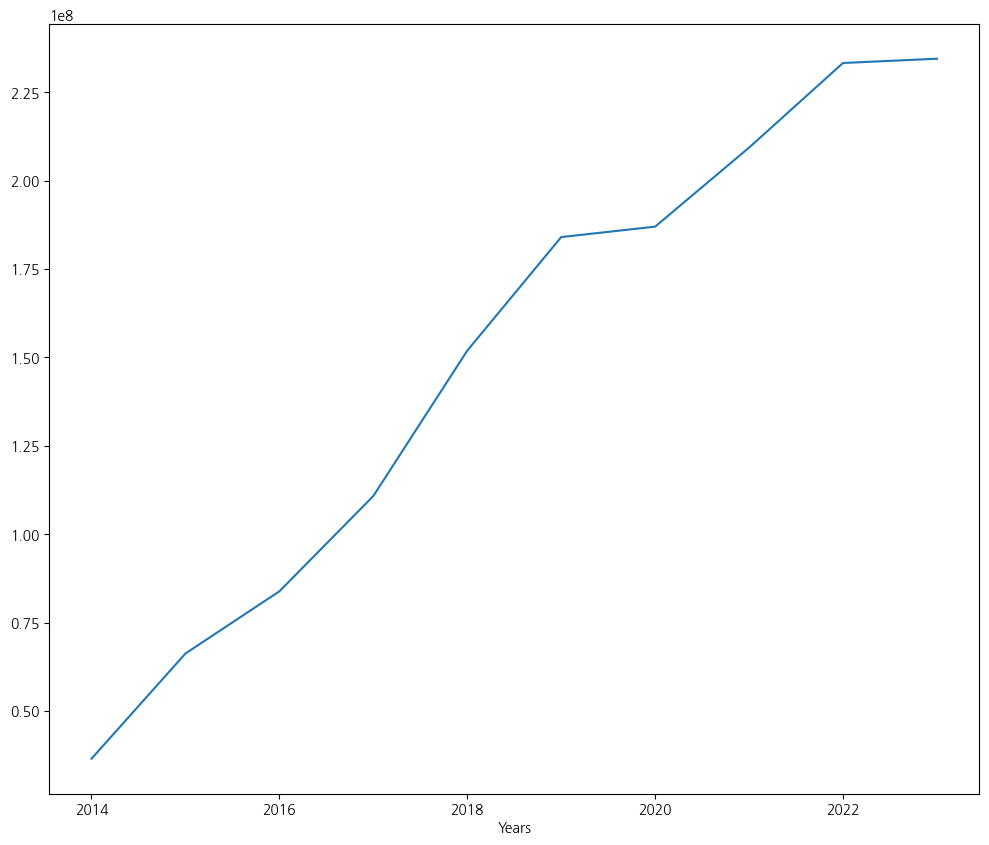

In [29]:
genreVi.loc["SF"].plot(figsize=(12, 10))

In [ ]:
befOTT = genreVi

In [ ]:
numOfGenreBefOTT = []

befOTT["Genre"] = befOTT["Genre"].apply(ast.literal_eval)
all_genres = befOTT["Genre"].explode()


for genre in genres:
    count = all_genres[all_genres == genre].count()
    count = count/5
    numOfGenreBefOTT.append(count)

data = {"Genre" : genres, "Number" : numOfGenreBefOTT}
num_of_genre_bef_ott = pd.DataFrame(data)
num_of_genre_bef_ott

In [ ]:
numOfGenreAftOTT = []

aftOTT["Genre"] = aftOTT["Genre"].apply(ast.literal_eval)
all_genres = aftOTT["Genre"].explode()


for genre in genres:
    count = all_genres[all_genres == genre].count()
    count = count/5
    numOfGenreAftOTT.append(count)

data = {"Genre" : genres, "Number" : numOfGenreAftOTT}
num_of_genre_aft_ott = pd.DataFrame(data)
num_of_genre_aft_ott